##### Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.style.use("ggplot")
pd.set_option("max_columns",50)

In [2]:
df =pd.read_csv('Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv')
df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


In [3]:
df.shape

(6390, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6390 non-null   object 
 1   UNIT            6390 non-null   object 
 2   UNIT_NUM        6390 non-null   int64  
 3   STUB_NAME       6390 non-null   object 
 4   STUB_NAME_NUM   6390 non-null   int64  
 5   STUB_LABEL      6390 non-null   object 
 6   STUB_LABEL_NUM  6390 non-null   float64
 7   YEAR            6390 non-null   int64  
 8   YEAR_NUM        6390 non-null   int64  
 9   AGE             6390 non-null   object 
 10  AGE_NUM         6390 non-null   float64
 11  ESTIMATE        5484 non-null   float64
 12  FLAG            906 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 649.1+ KB


In [5]:
df.describe()

,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
count,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,6390.000000,5484.000000
mean,1.872926,4.621909,4.686775,1997.525822,22.692019,2.712207,13.709810
std,0.333081,2.031777,1.829624,14.937451,12.286033,1.932280,11.531805
min,1.000000,0.000000,0.000000,1950.000000,1.000000,0.000000,0.300000
25%,2.000000,3.000000,3.230000,1988.000000,12.000000,0.000000,5.000000
50%,2.000000,5.000000,5.125100,1999.000000,23.000000,3.000000,10.500000
75%,2.000000,6.000000,6.153000,2009.000000,33.000000,4.100000,19.500000
max,2.000000,11.000000,7.235000,2018.000000,42.000000,6.000000,74.800000


### *Description of the object type*

The description below gives the top most group with the highest suicide by sex,race,age and Hispanic origin.

In [6]:
df.describe(include='O')

,INDICATOR,UNIT,STUB_NAME,STUB_LABEL,AGE,FLAG
count,6390,6390,6390,6390,6390,906
unique,1,2,12,161,15,2
top,Death rates for suicide,"Deaths per 100,000 resident population, crude","Sex, age and race",Female: Black or African American,All ages,...
freq,6390,5578,1596,87,1624,645


In [7]:
# drops all duplicates
df.drop_duplicates(keep=False).shape

(6390, 13)

In [8]:
df.isna().sum()

INDICATOR            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE           906
FLAG              5484
dtype: int64

In [9]:
df.columns

Index(['INDICATOR', 'UNIT', 'UNIT_NUM', 'STUB_NAME', 'STUB_NAME_NUM',
       'STUB_LABEL', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM', 'AGE', 'AGE_NUM',
       'ESTIMATE', 'FLAG'],
      dtype='object')

In [10]:
# Looking for some information in the column FLAG
df.FLAG.unique()

array([nan, '...', '*'], dtype=object)

In [11]:
# dropping multiple columns
dfNEW=df[[#'INDICATOR', 
    'UNIT', 
    #'UNIT_NUM', 
    'STUB_NAME', 
    # 'STUB_NAME_NUM',
       'STUB_LABEL', 
    #'STUB_LABEL_NUM', 
    'YEAR', 
    #'YEAR_NUM', 
    'AGE', 
    #'AGE_NUM',
       'ESTIMATE', 
    #'FLAG'
]].copy()

In [12]:
dfNEW.shape

(6390, 6)

In [13]:
# remove all the rows that contain a missing value
dfNEW=dfNEW.dropna()

In [14]:
dfNEW.shape

(5484, 6)

In [15]:
dfNEW.describe(include='O')

,UNIT,STUB_NAME,STUB_LABEL,AGE
count,5484,5484,5484,5484
unique,2,12,150,15
top,"Deaths per 100,000 resident population, crude","Sex, age and race",Female: Black or African American,All ages
freq,4761,1282,87,1422


In [16]:
dfNEW.columns

Index(['UNIT', 'STUB_NAME', 'STUB_LABEL', 'YEAR', 'AGE', 'ESTIMATE'], dtype='object')

In [17]:
dfNEW.STUB_NAME.unique()

array(['Total', 'Sex', 'Sex and race', 'Sex and race and Hispanic origin',
       'Sex and race (Single race)',
       'Sex and race and Hispanic origin (Single race)', 'Age',
       'Sex and age', 'Sex, age and race',
       'Sex, age and race and Hispanic origin',
       'Sex, age and race (Single race)',
       'Sex, age and race and Hispanic origin (Single race)'],
      dtype=object)

### *The Analysis below gives the highest Estimate of rate of suicide, but that may not be the group with the highest rate of suicide since it is an Estimate due to low occurance.* 
**I believe the highest or lowest death rate depends on the number of occurances and may not be on estimation.**


In [18]:
(dfNEW
 .groupby(['STUB_LABEL'])
 .agg(SUM_ESTIMATE=('ESTIMATE','sum'))
).sort_values(by=['SUM_ESTIMATE'],ascending=False)

,SUM_ESTIMATE
STUB_LABEL,
Male: White: 85 years and over,2514.5
Male: 85 years and over,2292.4
Male: White: 75-84 years,1956.4
Male: White,1856.2
Male: 75-84 years,1787.1
...,...
Female: Not Hispanic or Latino: Asian,7.8
Female: Not Hispanic or Latino: Asian: 15-24 years,6.9
Female: Not Hispanic or Latino: Asian: 45-64 years,4.8


In [19]:
(dfNEW
 .groupby(['STUB_LABEL'])
 .agg(SUM_ESTIMATE=('ESTIMATE','sum'))
).sort_values(by=['SUM_ESTIMATE'],ascending=False)[:10]

,SUM_ESTIMATE
STUB_LABEL,
Male: White: 85 years and over,2514.5
Male: 85 years and over,2292.4
Male: White: 75-84 years,1956.4
Male: White,1856.2
Male: 75-84 years,1787.1
Male,1654.1
Male: Not Hispanic or Latino: White,1647.8
Male: White: 65 years and over,1616.4
Male: 65 years and over,1470.3


### *The highest Estimate of Death rate of suicide*

<Figure size 432x576 with 0 Axes>

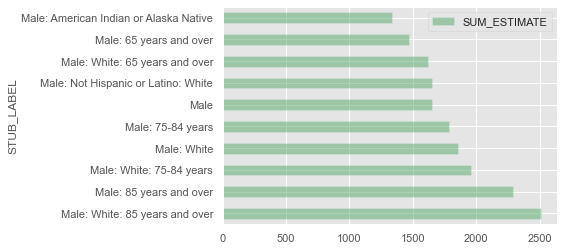

In [20]:
F = (dfNEW
 .groupby(['STUB_LABEL'])
 .agg(SUM_ESTIMATE=('ESTIMATE','sum'))
).sort_values(by=['SUM_ESTIMATE'],ascending=False)[:10]
plt.figure(figsize=(6, 8))
F.plot.barh(stacked=True,color='g', alpha=0.5)
plt.show()

### *Looking at the High occurance of death rate Suicide*

In [21]:
(dfNEW
 .groupby(['STUB_LABEL'])
 .agg(COUNT_ESTIMATE=('ESTIMATE','count'))
).sort_values(by=['COUNT_ESTIMATE'],ascending=False)

,COUNT_ESTIMATE
STUB_LABEL,
Female: Black or African American,87
Female: White,86
Male: White,86
Male: Black or African American,85
Female,84
...,...
Male: Not Hispanic or Latino: Native Hawaiian or Other Pacific Islander: 25-44 years,1
Female: Not Hispanic or Latino: Asian: 45-64 years,1
Male: Not Hispanic or Latino: Asian: 65 years and over,1


In [22]:
# The top ten Highest occurance suicide rate
(dfNEW
 .groupby(['STUB_LABEL'])
 .agg(COUNT_ESTIMATE=('ESTIMATE','count'))
).sort_values(by=['COUNT_ESTIMATE'],ascending=False)[:10]

,COUNT_ESTIMATE
STUB_LABEL,
Female: Black or African American,87
Female: White,86
Male: White,86
Male: Black or African American,85
Female,84
All persons,84
Male,84
Female: American Indian or Alaska Native,74
Male: American Indian or Alaska Native,74


### *The number of Occurance of Death rate suicide*

<Figure size 432x576 with 0 Axes>

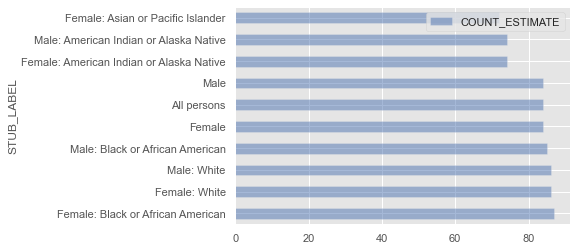

In [23]:
F = (dfNEW
 .groupby(['STUB_LABEL'])
 .agg(COUNT_ESTIMATE=('ESTIMATE','count'))
).sort_values(by=['COUNT_ESTIMATE'],ascending=False)[:10]
plt.figure(figsize=(6, 8))
F.plot.barh(stacked=True, color='b',alpha=0.5)
plt.show()

### *The above shows that Female: Black or African American commits the highest Death rates of suicide being 87 in number. The the analysis confirms it.*

### *The Top Must Succide committing group.*

In [24]:
df_STUB_LABEL=dfNEW.query('STUB_LABEL =="Female: Black or African American"').sort_values(by=['ESTIMATE'],ascending=False)
df_STUB_LABEL

,UNIT,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE
6297,"Deaths per 100,000 resident population, crude",Sex and race (Single race),Female: Black or African American,2018,All ages,11.9
338,"Deaths per 100,000 resident population, age-ad...",Sex and race,Female: Black or African American,1970,All ages,2.9
6298,"Deaths per 100,000 resident population, crude",Sex and race (Single race),Female: Black or African American,2018,All ages,2.8
377,"Deaths per 100,000 resident population, age-ad...",Sex and race,Female: Black or African American,2018,All ages,2.8
2953,"Deaths per 100,000 resident population, crude",Sex and race,Female: Black or African American,2018,All ages,2.8
...,...,...,...,...,...,...
2913,"Deaths per 100,000 resident population, crude",Sex and race,Female: Black or African American,1960,All ages,1.6
2937,"Deaths per 100,000 resident population, crude",Sex and race,Female: Black or African American,2002,All ages,1.5
2912,"Deaths per 100,000 resident population, crude",Sex and race,Female: Black or African American,1950,All ages,1.5
365,"Deaths per 100,000 resident population, age-ad...",Sex and race,Female: Black or African American,2006,All ages,1.4


In [25]:
df_STUB_LABEL.head(10)

,UNIT,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE
6297,"Deaths per 100,000 resident population, crude",Sex and race (Single race),Female: Black or African American,2018,All ages,11.9
338,"Deaths per 100,000 resident population, age-ad...",Sex and race,Female: Black or African American,1970,All ages,2.9
6298,"Deaths per 100,000 resident population, crude",Sex and race (Single race),Female: Black or African American,2018,All ages,2.8
377,"Deaths per 100,000 resident population, age-ad...",Sex and race,Female: Black or African American,2018,All ages,2.8
2953,"Deaths per 100,000 resident population, crude",Sex and race,Female: Black or African American,2018,All ages,2.8
2952,"Deaths per 100,000 resident population, crude",Sex and race,Female: Black or African American,2017,All ages,2.7
800,"Deaths per 100,000 resident population, age-ad...",Sex and race (Single race),Female: Black or African American,2018,All ages,2.7
376,"Deaths per 100,000 resident population, age-ad...",Sex and race,Female: Black or African American,2017,All ages,2.7
2914,"Deaths per 100,000 resident population, crude",Sex and race,Female: Black or African American,1970,All ages,2.6
347,"Deaths per 100,000 resident population, age-ad...",Sex and race,Female: Black or African American,1988,All ages,2.5


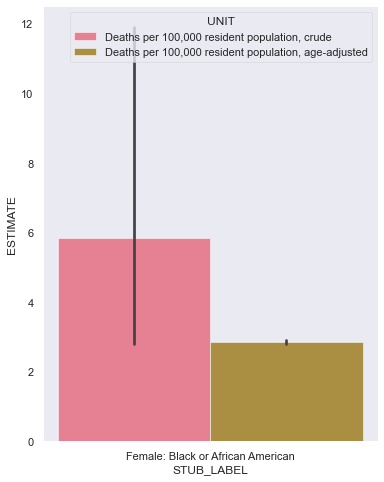

In [26]:
F = df_STUB_LABEL.head()
sns.set_style("ticks")
sns.set_style("dark")
sns.set_palette("husl")
plt.figure(figsize=(6, 8))
sns.barplot(x="STUB_LABEL", y="ESTIMATE",hue="UNIT" ,data=F)
plt.show()

### *Aggregating the most occured death rate of suicide.*

In [27]:
(df_STUB_LABEL
 .groupby(['STUB_LABEL'])
 .agg(SUM_ESTIMATE=('ESTIMATE','sum'))
)

,SUM_ESTIMATE
STUB_LABEL,
Female: Black or African American,188.3


### *The above shows that Female: Black or African American commits the highest Death rates of suicide being 87 in number and Female: Black or African American of Sex and race (Single race) and of all ages have the highest estimate being 11.9 in 2018 as shown*

### *Investigating the lowest Death rates of suicide in the table above(STUB_LABEL) with age inclusive.*

In [28]:
(dfNEW
 .groupby(['STUB_LABEL'])
 .agg(COUNT_ESTIMATE=('ESTIMATE','count'))
).sort_values(by=['COUNT_ESTIMATE'],ascending=True)[:15]

,COUNT_ESTIMATE
STUB_LABEL,
Female: Not Hispanic or Latino: Asian: 25-44 years,1
Female: Not Hispanic or Latino: Asian: 65 years and over,1
Female: Not Hispanic or Latino: Asian: 45-64 years,1
Female: Not Hispanic or Latino: Asian: 15-24 years,1
Male: Not Hispanic or Latino: Native Hawaiian or Other Pacific Islander: 25-44 years,1
Male: Not Hispanic or Latino: Asian: 65 years and over,1
Male: Not Hispanic or Latino: Asian: 45-64 years,1
Male: Not Hispanic or Latino: Asian: 25-44 years,1
Male: Not Hispanic or Latino: Asian: 15-24 years,1


<Figure size 432x576 with 0 Axes>

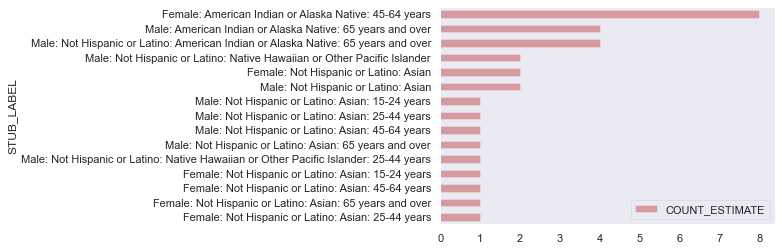

In [29]:
F = (dfNEW
 .groupby(['STUB_LABEL'])
 .agg(COUNT_ESTIMATE=('ESTIMATE','count'))
).sort_values(by=['COUNT_ESTIMATE'],ascending=True)[:15]
plt.figure(figsize=(6, 8))
F.plot.barh(stacked=True, color='r',alpha=0.5)
plt.show()


#### Investigating Male: Not Hispanic or Latino: Native Hawaiian or Other Pacific Islander: 25-44 years

In [30]:
df_STUB_LABEL_LOWEST=dfNEW.query('STUB_LABEL =="Male: Not Hispanic or Latino: Native Hawaiian or Other Pacific Islander: 25-44 years"')
df_STUB_LABEL_LOWEST

,UNIT,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE
6351,"Deaths per 100,000 resident population, crude","Sex, age and race and Hispanic origin (Single ...",Male: Not Hispanic or Latino: Native Hawaiian ...,2018,25-44 years,38.1


In [31]:
dfNEW[(dfNEW.STUB_LABEL.str.contains('Not Hispanic or Latino: Asian:'))].sort_values(by=['ESTIMATE'],ascending=True)

,UNIT,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE
6361,"Deaths per 100,000 resident population, crude","Sex, age and race and Hispanic origin (Single ...",Female: Not Hispanic or Latino: Asian: 65 year...,2018,65 years and over,3.6
6359,"Deaths per 100,000 resident population, crude","Sex, age and race and Hispanic origin (Single ...",Female: Not Hispanic or Latino: Asian: 25-44 y...,2018,25-44 years,4.2
6360,"Deaths per 100,000 resident population, crude","Sex, age and race and Hispanic origin (Single ...",Female: Not Hispanic or Latino: Asian: 45-64 y...,2018,45-64 years,4.8
6358,"Deaths per 100,000 resident population, crude","Sex, age and race and Hispanic origin (Single ...",Female: Not Hispanic or Latino: Asian: 15-24 y...,2018,15-24 years,6.9
6347,"Deaths per 100,000 resident population, crude","Sex, age and race and Hispanic origin (Single ...",Male: Not Hispanic or Latino: Asian: 25-44 years,2018,25-44 years,10.5
6348,"Deaths per 100,000 resident population, crude","Sex, age and race and Hispanic origin (Single ...",Male: Not Hispanic or Latino: Asian: 45-64 years,2018,45-64 years,12.3
6349,"Deaths per 100,000 resident population, crude","Sex, age and race and Hispanic origin (Single ...",Male: Not Hispanic or Latino: Asian: 65 years ...,2018,65 years and over,13.7
6346,"Deaths per 100,000 resident population, crude","Sex, age and race and Hispanic origin (Single ...",Male: Not Hispanic or Latino: Asian: 15-24 years,2018,15-24 years,15.5


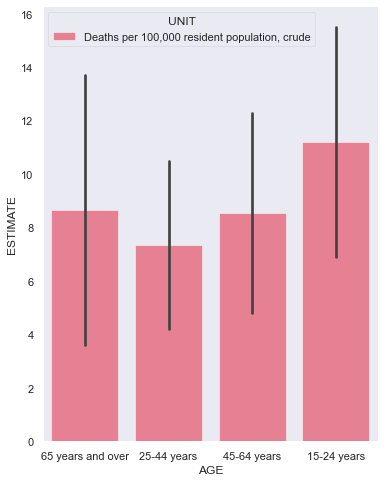

In [32]:
F = dfNEW[(dfNEW.STUB_LABEL.str.contains('Not Hispanic or Latino: Asian:'))].sort_values(by=['ESTIMATE'],ascending=True)
plt.figure(figsize=(6, 8))
sns.set_style("dark")
sns.set_palette("husl")
sns.color_palette("rainbow") 
sns.barplot(x="AGE", y="ESTIMATE",hue="UNIT" ,data=F)
plt.show()

### *The above Analysis shows that Female: Not Hispanic or Latino: Asian: 65 year age of Sex, age and race and Hispanic origin (Single race) have the lowest rate of 3.6 Estimate in 2018.*

### SUMMARY  
* The above analysis shows that The highest Estimate of Death rate of suicide is in STUB_LABEL (Male: White: 85 years and over)
* The number of Highest Occurance of suicide is found among Female: Black or African American of all ages
* The Lowest occurance of suicide is found in Female: Not Hispanic or Latino: Asian: 65 years and over and in relation to the number pf estimate   
* The people of America shows high suicide rate more than of any other race or origin. 
* This shows that **gender,age and origin are factors responsible** for the high death rate of suicide
